In [23]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from typing import Tuple, Callable
from enum import IntEnum
import random
from IPython.display import clear_output

In [24]:
def windygridworld(state,action):


  if state == (7,3):
    return 0,(0,0)

  new_state = (0,0)

  if action == 0:
    new_state = ( state[0]-1,state[1] ) #left
  elif action == 1:
    new_state = ( state[0]+1,state[1] )  #right
  elif action == 2:
    new_state = ( state[0],state[1] +1 ) #up
  elif action ==3:
    new_state = (state[0],state[1]-1) #down
  elif action ==4:
    new_state = (state[0]-1,state[1]-1) #down Left
  elif action ==5:
    new_state = (state[0]+1,state[1]-1) #down right
  elif action ==6:
    new_state = (state[0]+1,state[1]+1) # up right
  elif action ==7:
    new_state = (state[0]-1,state[1]+1) #up left
  elif action ==8:
    new_state = (state[0],state[1]) # no motion

  if new_state[0]<0 or new_state[1]<0 or new_state[0]>9 or new_state[1]>6:
    new_state=state


  temp=new_state


  if state[0] == 3 or state[0] == 4 or state[0] == 5 or state[0] == 8:
    new_state=(new_state[0],new_state[1]+1)
  elif state[0]==6 or state[0]==7:
    new_state=(new_state[0],new_state[1]+2)



  if new_state[0]<0 or new_state[1]<0 or new_state[0]>9 or new_state[1]>6:
    new_state=temp

  return -1,new_state

    
   


In [25]:
def selectaction_mc(arr,state):

  array_init = [0]*90+[1]*10

  choice=np.random.choice(array_init)

  if choice == 1:
    myarr=[]
    for i in range(4):
      myarr=myarr+[i]
    
    X = np.random.choice(myarr)
    return X
  else:
    max_val=0
    index=0
    myarr=[]
    for i in range(4):
      if arr[(state,i)]>max_val:
        max_val=arr[(state,i)]
        index=i
 
    return max_val


def mc(world,action_space,runs):

    V = {}
    Q = world
    Vres=[]
    initQ=[]
    initQ.append(0)
    actionSpace = action_space 
    stateSpace = []
    G = {}
    N = {}
    n={}
    for i in range(10):
        for j in range(7):
            stateSpace.append((i,j))
            for a in actionSpace:
                N[(i,j)]=0
                V[(i,j)]=0
                n[(i,j),a]=0


    policy = {}
    for state in stateSpace:
        policy[state]= [1]*len(actionSpace)  


    numEpisodes = 1500
    ts=[]
    episode = []
    episodes_counter = 0
    time_step_counter=0

    num_runs=8000

    while episodes_counter<runs+100:
        


        current_state = (0,3)
        reward = -1

        agentStates = []
        time_step_counter=0

        while reward!=0 and time_step_counter<20000:

          action = selectaction_mc(Q,current_state)
          reward,new_state = windygridworld(current_state,action)
    

          if ((current_state),action) in agentStates:
           
                tempTuple=(100,100)
                agentStates.append((tempTuple,1))
          else:
              
                agentStates.append(  ((current_state),action)   )
          current_state=new_state
          ts.append(time_step_counter)
          
          episode.append(episodes_counter)
          time_step_counter=time_step_counter+1  

        episodes_counter=episodes_counter+1     
    

        my_reward=0
        for j in range(len(agentStates)):
            if(agentStates[j][1]==100 or agentStates[j][0]==(100,100)):
                donothing='pew pew'
            else:
                my_reward=my_reward+1
                myTuple = agentStates[j]
                N[myTuple[0]] = N[myTuple[0]]+1
                n[myTuple]=n[myTuple]+1
                if j==len(agentStates)-1:
                  rev=0
                else:
                  n_state=(100,100)
                  x=j+1
                  while n_state==(100,100) and x<len(agentStates):
                    n_state=agentStates[x][0]
                    x=x+1
                  if x==len(agentStates):
                    n_state=myTuple[0]
                  rev=-1+V[n_state]
                if episodes_counter<runs:
                  V[myTuple[0]] = V[myTuple[0]] + ( rev - V[myTuple[0]] )/N[myTuple[0]]
                  Q[myTuple] = Q[myTuple] + ( rev - Q[myTuple] )/n[myTuple]
                  max_val=-80000000
                  maxindex=0                 

                  for k in range(len(policy[(0,0)])):
                      if Q[(agentStates[j][0],k)]>max_val:
                          max_val=Q[(agentStates[j][0],k)]
                          maxindex=k
                          #if j ==0:
                  policy[agentStates[j][0]][maxindex]= (1-0.1+(0.1/4))*10
                  
                  for looper in range(len(policy[(0,0)])):
                    if looper != maxindex:
                      policy[agentStates[j][0]][looper]=(0.1/4)*10

        if episodes_counter>runs:
          Vres.append(-my_reward)
    

    return Vres




In [26]:
def selectaction_sarsa(Q,state,actionSpace):

  array_init =[0]*90+[1]*10

  choice=np.random.choice(array_init)

  if choice == 0:

    num_actions =len(actionSpace)   
    max_val=-8000000000

    for i in range(num_actions):
      if Q[(state,i)]>max_val:
        max_val = Q[(state,i)]
        action = i

    return action   

  else:
    arr = actionSpace  
    return np.random.choice(arr)




def sarsa(Qu,action_space,runs):
    V = {}
    initQ=[]
    initQ.append(0)
    Q=Qu
    actionSpace = action_space    #
    stateSpace = []
    G = {}
    N = {}
    for i in range(10):
        for j in range(7):
            stateSpace.append((i,j))
            for a in actionSpace:
                N[(i,j)]=0
                V[(i,j)]=0
    
    ts=[]
    episode = []
    episodes_counter = 0
    time_step_counter=0
    v_runs=[]

    num_runs=8000
   
    while episodes_counter<runs+100:
        


        current_state = (0,3)
        reward = -1
        nextmewmew= (-1,-1)

        action = selectaction_sarsa(Q,current_state,action_space)
        while reward!=0:

          reward,new_state = windygridworld(current_state,action)
          if nextmewmew==(-1,-1):
            nextmewmew=new_state
          new_action = selectaction_sarsa(Q,new_state,action_space)

          ts.append(time_step_counter)
          episode.append(episodes_counter)
          time_step_counter=time_step_counter+1 

          if reward!=0 and episodes_counter<runs:
            V[current_state] = V[current_state] + 0.5* ( reward + V[new_state] - V[current_state] )
            Q[(current_state,action)] = Q[(current_state,action)] + 0.5* ( reward + Q[(new_state,new_action)] - Q[(current_state,action)] )
          elif episodes_counter<runs:
            V[current_state] = V[current_state] + 0.5* ( reward + 0 - V[current_state] )
            Q[(current_state,action)] = Q[(current_state,action)] + 0.5* ( reward + 0 - Q[(current_state,action)] )

          action=new_action
          current_state=new_state
        
        episodes_counter=episodes_counter+1   
        if episodes_counter>runs:
          v_runs.append(-1+V[nextmewmew])     


    return v_runs



In [27]:
def selectaction_policy_sar(Q,state,actionSpace):

  array_init = [0]*90+[1]*10

  choice=np.random.choice(array_init)

  if choice == 0:

    num_actions =len(actionSpace)    
    max_val=-8000000000

    for i in range(num_actions):
      if Q[(state,i)]>max_val:
        max_val = Q[(state,i)]
        action = i

    return action   

  else:
    arr = actionSpace  
    return np.random.choice(arr)




def policy_sar(action_space):
    Q = {}
    initQ=[]
    initQ.append(0)
    actionSpace = action_space    
    stateSpace = []
    G = {}
    N = {}
    for i in range(10):
        for j in range(7):
            stateSpace.append((i,j))
            for a in actionSpace:
                N[((i,j),a)]=0
                Q[((i,j),a)]=0
                G[((i,j),a)]=0
    ts=[]
    episode = []
    episodes_counter = 0
    time_step_counter=0

    num_runs=8000
   

    while time_step_counter<num_runs:

        current_state = (0,3)
        reward = -1

        action = selectaction_policy_sar(Q,current_state,action_space)
        while reward!=0 and time_step_counter<num_runs:

          reward,new_state = windygridworld(current_state,action)
          new_action = selectaction_policy_sar(Q,new_state,action_space)

          ts.append(time_step_counter)
          episode.append(episodes_counter)
          time_step_counter=time_step_counter+1 

          if reward!=0:
            Q[(current_state,action)] = Q[(current_state,action)] + 0.5* ( reward + Q[(new_state,new_action)] - Q[(current_state,action)] )
          else:
            Q[(current_state,action)] = Q[(current_state,action)] + 0.5* ( reward + 0 - Q[(current_state,action)] )

          action=new_action
          current_state=new_state
        
        episodes_counter=episodes_counter+1        


    return Q,ts,episode






In [28]:
def average(arr):
  avg=[]
  for i in range(8000):
    cumsum=0
    for j in range(10):
      cumsum=cumsum+arr[j][i]
    avg.append(cumsum/10)
  return avg


def avg(array):
    steps=8000
    arr=[0]*steps
    upper=[0]*steps
    lower=[0]*steps
    for i in range(0,steps):
        cum=0
        runs=10
        for j in range(0,runs):
            cum=cum+array[j][i]
        arr[i]=cum/(runs*1.0)
        
        cum=0
        
        for j in range(0,runs):
            cum=cum+((arr[i]-array[j][i])*(arr[i]-array[j][i]))
        limits = 1.96*((cum/runs)**0.5)/(runs**0.5)
        upper[i]=arr[i]+limits
        lower[i]=arr[i]-limits
        
        
        
        
    return upper,lower

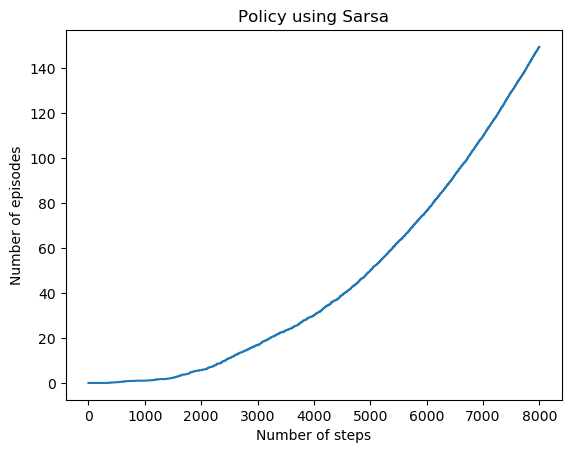

In [29]:
steps=[]
episodes=[]
for i in range(10):
  Q,a,b=policy_sar([0,1,2,3])
  steps.append(b)
  episodes.append(a)

epavg = average(episodes)
stepsavg = average(steps)
plt.set_title('Policy using Sarsa')
plt.set_xlabel('Number of steps')
plt.set_ylabel('Number of episodes')
plt.plot(epavg,stepsavg) 


In [30]:
vmc1 = (mc(Q,[0,1,2,3],1))
vmc10 = mc(Q,[0,1,2,3],10)
vmc50 = mc(Q,[0,1,2,3],50)
vsarsa1 = sarsa(Q,[0,1,2,3],1)
vsarsa10 = sarsa(Q,[0,1,2,3],10)
vsarsa50 = sarsa(Q,[0,1,2,3],50)

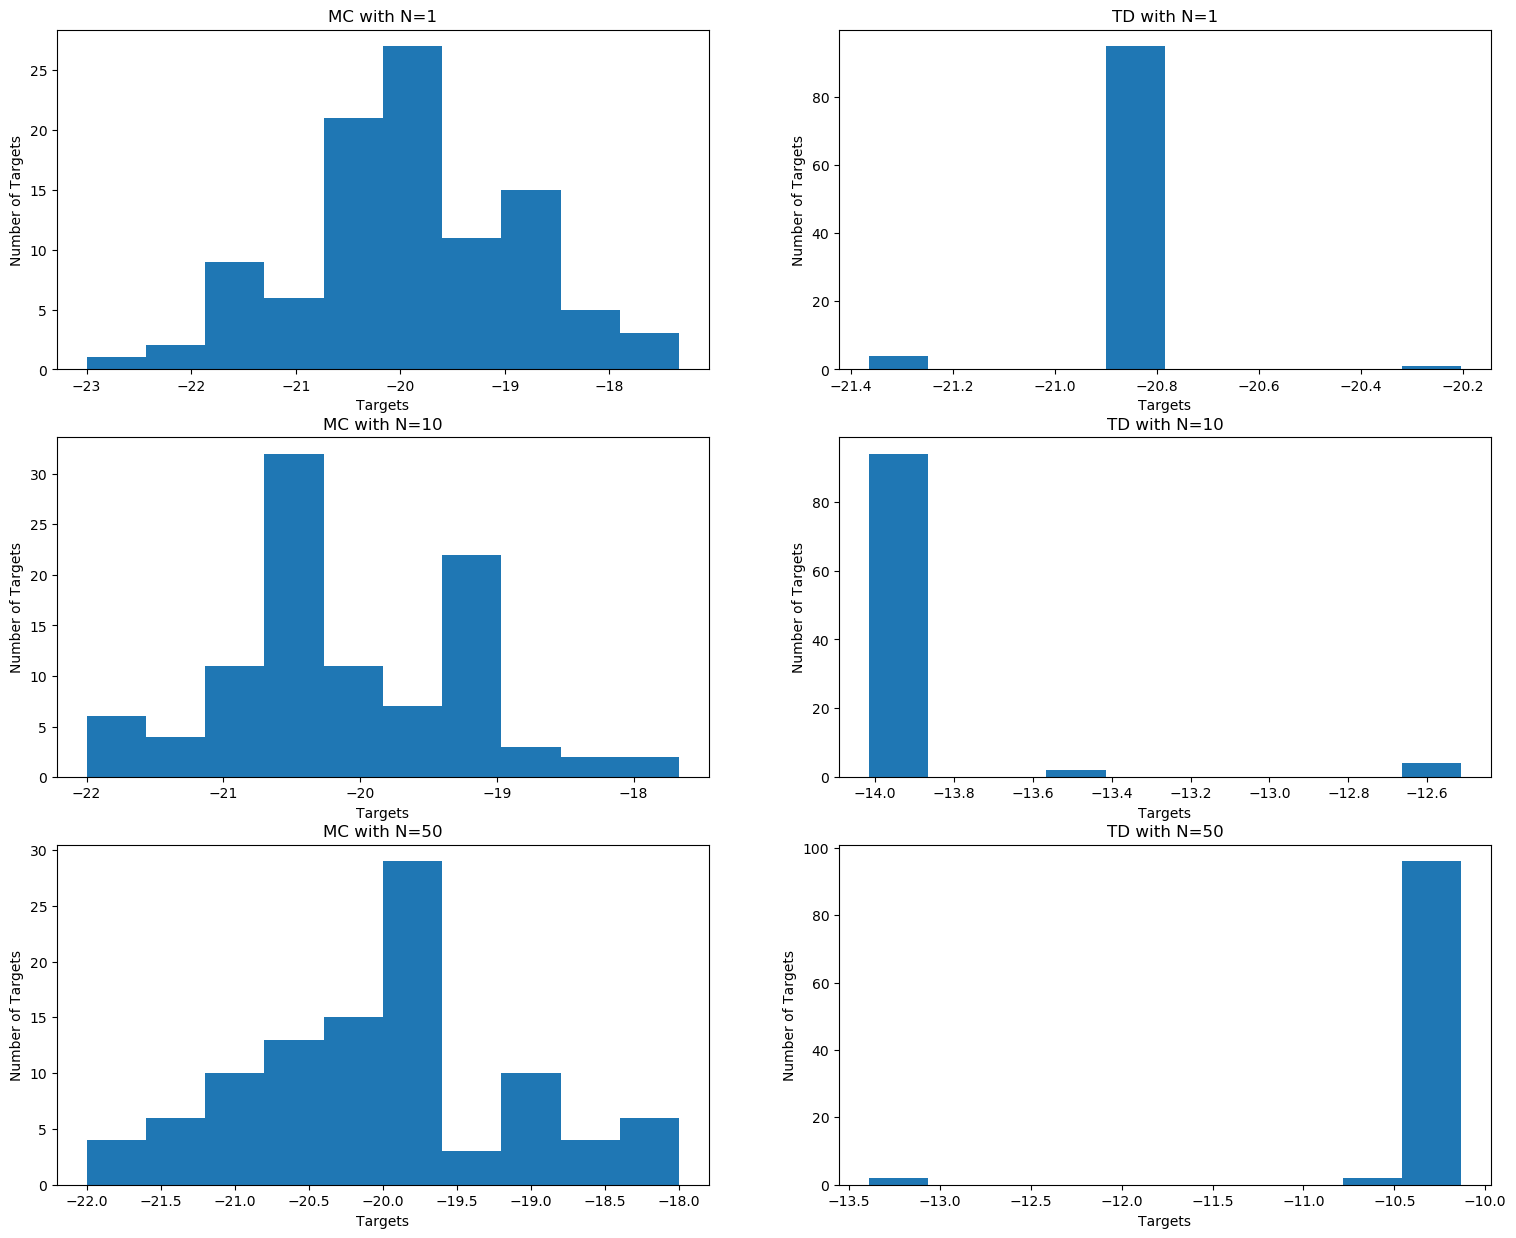

In [35]:
fig,((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(3,2)
ax0.hist([element*1/3 for element in vmc1])
ax0.set_title('MC with N=1')
ax0.set_xlabel('Targets')
ax0.set_ylabel('Number of Targets')
ax2.hist([element*1/3 for element in vmc10])
ax2.set_title('MC with N=10')
ax2.set_xlabel('Targets')
ax2.set_ylabel('Number of Targets')
ax4.hist([element*1/3 for element in vmc50])
ax4.set_title('MC with N=50')
ax4.set_xlabel('Targets')
ax4.set_ylabel('Number of Targets')
ax1.hist(vsarsa1)
ax1.set_title('TD with N=1')
ax1.set_xlabel('Targets')
ax1.set_ylabel('Number of Targets')
ax3.hist(vsarsa10)
ax3.set_title('TD with N=10')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Number of Targets')
ax5.hist(vsarsa50)
ax5.set_title('TD with N=50')
ax5.set_xlabel('Targets')
ax5.set_ylabel('Number of Targets')

fig.set_size_inches(18.5, 15)
plt.show()